In [10]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from prophet import Prophet

In [45]:
df = yf.download('SOL-USD', start='2016-12-08', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614
...,...,...,...,...,...,...,...
990,2022-12-26,11.387690,11.453410,11.138464,11.306611,11.306611,132410401
991,2022-12-27,11.309179,11.390708,10.766210,11.085430,11.085430,223332961
992,2022-12-28,11.084863,11.098109,9.522949,9.755906,9.755906,468728777
993,2022-12-29,9.755775,9.827129,8.141268,9.651783,9.651783,772500177


In [46]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
985,2022-12-21,12.128985
986,2022-12-22,11.794829
987,2022-12-23,11.786166
988,2022-12-24,11.444276
989,2022-12-25,11.387903
990,2022-12-26,11.306611
991,2022-12-27,11.085430
992,2022-12-28,9.755906
993,2022-12-29,9.651783
994,2022-12-30,9.880177


In [47]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/f_4miypu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/l63ia7s4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48382', 'data', 'file=/tmp/tmpjb5rn7zm/f_4miypu.json', 'init=/tmp/tmpjb5rn7zm/l63ia7s4.json', 'output', 'file=/tmp/tmpjb5rn7zm/prophet_modelqslr291k/prophet_model-20230105085219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:52:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:52:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [48]:
df = df[:-1]
df

,ds,y
0,2020-04-10,0.951054
1,2020-04-11,0.776819
2,2020-04-12,0.882507
3,2020-04-13,0.777832
4,2020-04-14,0.661925
...,...,...
989,2022-12-25,11.387903
990,2022-12-26,11.306611
991,2022-12-27,11.085430
992,2022-12-28,9.755906


In [49]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-10,2.816843,-3.784958,26.459575,2.816843,2.816843,7.958030,7.958030,7.958030,-0.285990,-0.285990,-0.285990,8.244020,8.244020,8.244020,0.0,0.0,0.0,10.774873
1,2020-04-11,2.952463,-4.515232,28.155706,2.952463,2.952463,8.330678,8.330678,8.330678,0.211640,0.211640,0.211640,8.119038,8.119038,8.119038,0.0,0.0,0.0,11.283140
2,2020-04-12,3.088082,-3.814403,26.988860,3.088082,3.088082,8.200957,8.200957,8.200957,0.246689,0.246689,0.246689,7.954269,7.954269,7.954269,0.0,0.0,0.0,11.289039
3,2020-04-13,3.223702,-4.956698,25.789454,3.223702,3.223702,7.564360,7.564360,7.564360,-0.191613,-0.191613,-0.191613,7.755972,7.755972,7.755972,0.0,0.0,0.0,10.788061
4,2020-04-14,3.359321,-5.226643,25.286450,3.359321,3.359321,7.222991,7.222991,7.222991,-0.307098,-0.307098,-0.307098,7.530089,7.530089,7.530089,0.0,0.0,0.0,10.582312


In [50]:
from prophet import Prophet
from matplotlib import pyplot as pd

In [51]:
future.tail()

,ds
1355,2023-12-26
1356,2023-12-27
1357,2023-12-28
1358,2023-12-29
1359,2023-12-30


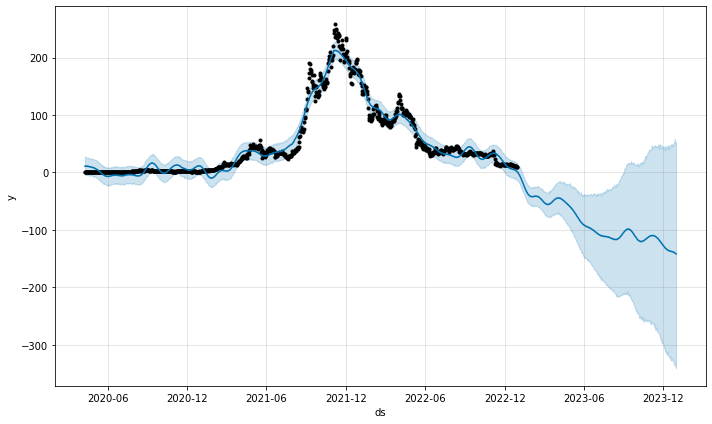

In [52]:
plot1 = m.plot(forecast)